In [70]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [335]:
start = "\033[1m"
end = "\033[0;0m"
red = "\033[91m"
purple = '\033[95m'

PURPLE = '\033[95m'
CYAN = '\033[96m'
DARKCYAN = '\033[36m'
BLUE = '\033[94m'
GREEN = '\033[92m'
YELLOW = '\033[93m'
RED = '\033[91m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'
END = '\033[0m'

In [99]:
titles = pd.read_csv('titles.csv')
titles.head()

,title,year
0,The Gay Diplomat,1931
1,The Danger Zone,1918
2,Prinsessens Tilbeder,1918
3,Proof of Life,2000
4,Orion,2013


In [5]:
cast = pd.read_csv('cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015.0,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985.0,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017.0,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015.0,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015.0,$hutter,actor,1988 Opera House Patron,NaN


In [23]:
t=titles
c=cast

### 1. What are the ten most common movie names of all time?

In [24]:
x=t.title.value_counts().sort_values(ascending=False).head(10)
print(f"{start}{red} 10 most common movies of all times from TITLES data{end}")
print(x)

print("--------------------------------------------------\n")

print(f"{start}{red} 10 most common movies of all times from CAST data{end}")
y=cast.title.value_counts().sort_values(ascending=False).head(10)
print(y)

 10 most common movies of all times from TITLES data
title
Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Freedom                 11
Maya                    11
The Three Musketeers    11
Othello                 11
Temptation              11
Kismet                  10
Name: count, dtype: int64
--------------------------------------------------

 10 most common movies of all times from CAST data
title
Around the World in Eighty Days       826
The Dark Knight Rises                 355
7 cajas                               341
The Ten Commandments                  317
The Buccaneer                         306
King Kong                             294
Stuck on You                          271
Cockneys vs Zombies                   266
The Eschatrilogy: Book of the Dead    256
Thelma                                256
Name: count, dtype: int64


### 2. Which three years of the 1930s saw the most films released?

In [47]:
print(f"{start}{red}  3 years of the 1930s that saw the release of most of the movies from CAST Data{end}")
print(c[c.year // 10*10 == 1930 ]['year'].value_counts().sort_values().head(3))

print("--------------------------------------------------\n")

print(f"{start}{red}  3 years of the 1930s that saw the release of most of the movies from TITLE Data{end}")
print(t[t.year //10*10==1930].year.value_counts().sort_values().head(3))



  3 years of the 1930s that saw the release of most of the movies from CAST Data
year
1930.0    6188
1931.0    7601
1932.0    9893
Name: count, dtype: int64
--------------------------------------------------

  3 years of the 1930s that saw the release of most of the movies from TITLE Data
year
1930    843
1933    901
1931    906
Name: count, dtype: int64


### 3. Plot the number of films that have been released each decade over the history of cinema.

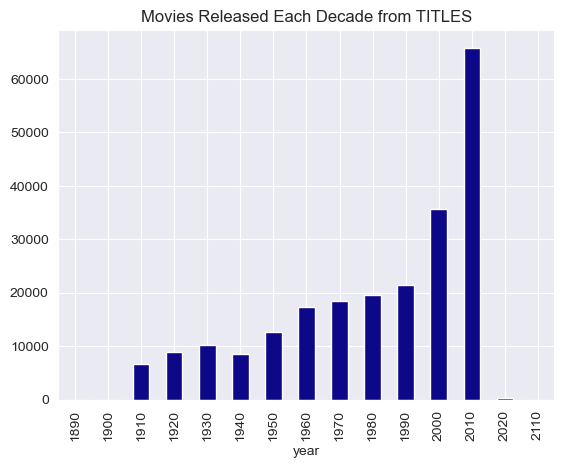

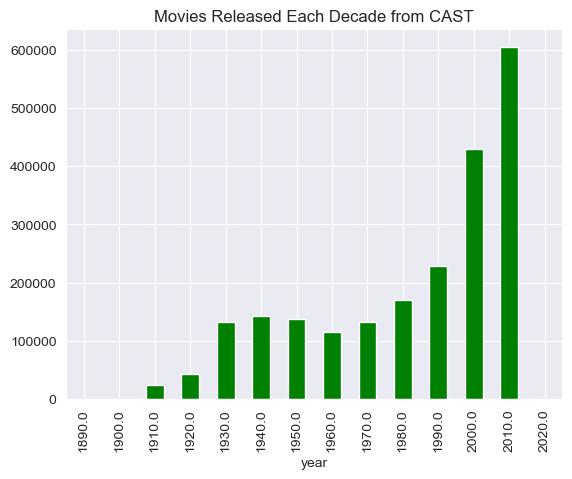

In [85]:
# t = titles

sns.set_style(style='darkgrid')
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar',cmap='plasma')
plt.title("Movies Released Each Decade from TITLES")
plt.show()

plt.title("Movies Released Each Decade from CAST")
(c.year //10*10).value_counts().sort_index().plot(kind='bar',color='green')
plt.show()



### 4. Plot the number of "Hamlet" films made each decade.

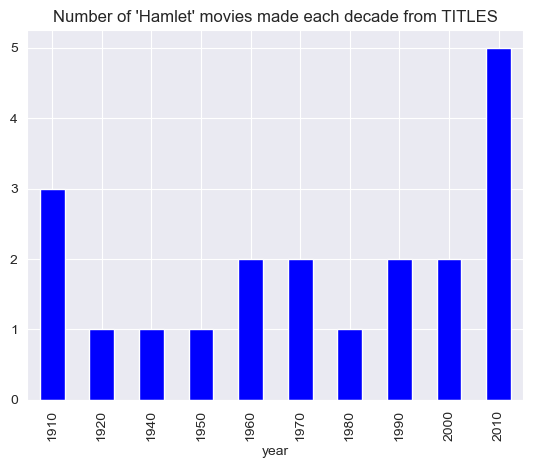

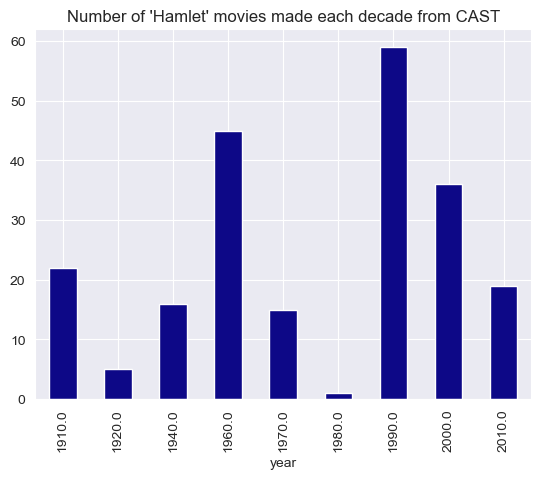

In [111]:
tHamlet=t[t.title == 'Hamlet']
(t.year// 10*10).value_counts().sort_index().plot(kind='bar',cmap='winter')
plt.title("Number of \'Hamlet\' movies made each decade from TITLES")
plt.show()


cHamlet=c[c.title == 'Hamlet']
(cHamlet.year// 10*10).value_counts().sort_index().plot(kind='bar',cmap='plasma')
plt.title("Number of \'Hamlet\' movies made each decade from CAST")
plt.show()

### 5. Plot the number of "Rustler" characters in each decade of the history of film.

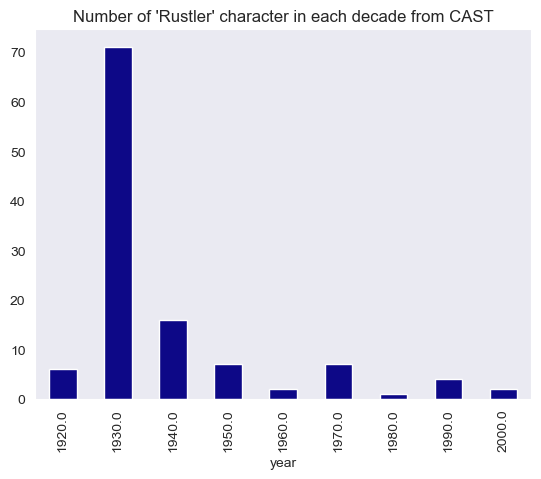

In [131]:
sns.set_style(style='dark')
c=cast
c=c[c.character == "Rustler"]
(c.year // 10 *10).value_counts().sort_index().plot(kind='bar',cmap='plasma')
plt.title("Number of \'Rustler\' character in each decade from CAST")
plt.show()

### 6. Plot the number of "Hamlet" characters each decade.

####  Valid plot kinds: ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')

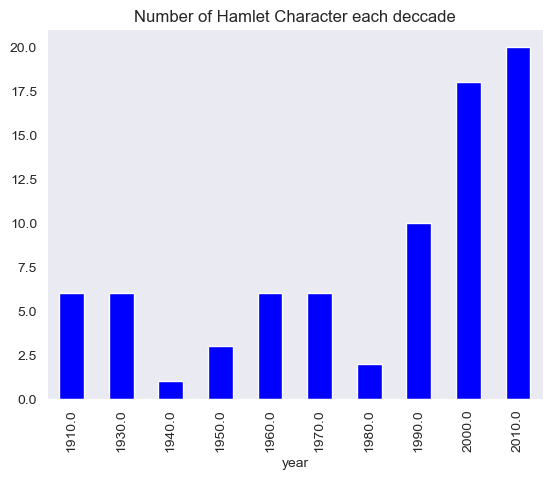

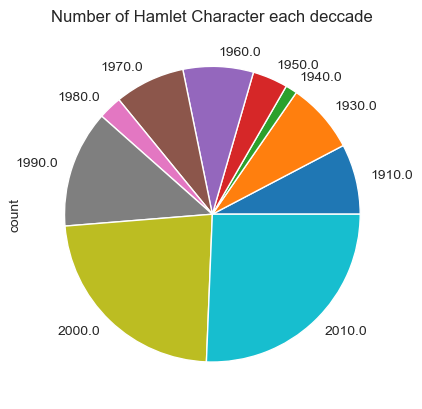

In [159]:
c=cast
cHamlet = c[c['character']=='Hamlet']
(cHamlet.year // 10 *10).value_counts().sort_index().plot(kind='bar',title="Number of Hamlet Character each deccade",cmap='winter' )
plt.show()
(cHamlet.year // 10 *10).value_counts().sort_index().plot(kind='pie',title="Number of Hamlet Character each deccade",)
plt.show()

### 7. What are the 11 most common character names in movie history?

In [189]:

%%time
c=cast
series=c.character.value_counts().sort_values(ascending=False).head(11)
series

print(f"{start}{red}the 11 most common character names in the Movie history is:{end}\n\n{series}")

# USED UNSTACK 

# c=cast
# series=c.character.value_counts().sort_values(ascending=False).head(11)
# df = series.to_frame()
# df['extra']=1
# df

# df= df.set_index('extra',append=True)
# df['count'].sort_values(ascending=False)

# df.unstack('character')

the 11 most common character names in the Movie history is:

character
Himself      17396
Policeman     6158
Doctor        5922
Extra         5625
Reporter      5516
Townsman      5065
Bartender     5055
Waiter        4662
Henchman      4309
Dancer        4110
Soldier       3901
Name: count, dtype: int64
CPU times: total: 1.86 s
Wall time: 1.89 s


### 8. Who are the 10 people most often credited as "Herself" in film history?

In [205]:
c=cast
cHerself = c[c.character == 'Herself']

cHerself = cHerself['name'].value_counts().head(10)
print(f"{start}{red}10 people most often credited as \'HERSELF\' in the Film History are{end}\n\n{cHerself}")

10 people most often credited as 'HERSELF' in the Film History are

name
Etta Baker           1
Rosemari Mealy       1
Salsa Katanga        1
Bronwyn Kay          1
Verlina Kirk         1
Swami Kripananda     1
Annette Krupnicka    1
Darcy Leigh          1
Eugenia (II) Le?n    1
Shangay Lily         1
Name: count, dtype: int64


### 9. Who are the 10 people most often credited as "Himself" in film history?

In [204]:
cHimself=c[c.character =="Himself"]
cHimself = cHimself.name.value_counts().head(10)
print(f"{start}{red}10 people most often credited as \'HIMSELF\' in the Film History are{end}\n\n{cHimself}")

10 people most often credited as 'HIMSELF' in the Film History are

name
Adolf Hitler             99
Richard Nixon            45
Ronald Reagan            39
John F. Kennedy          33
Winston Churchill        23
Ron Jeremy               23
George W. Bush           23
Benito Mussolini         22
Bill Clinton             20
Franklin D. Roosevelt    20
Name: count, dtype: int64


### 10. Which actors or actresses appeared in the most movies in the year 1945?

In [218]:
c=cast        #(2159949, 6)
# c.type.shape  #2159949
# c.type.isnull().sum()
x= c[c.year == 1945].name.value_counts().head(10)
print(f"{start}{red}The Actors and Actresses who appeared most in movies made in 1945 are : {end}\n\n{x}")


The Actors and Actresses who appeared most in movies made in 1945 are : 

name
Sam (II) Harris     32
Harold Miller       29
Nolan Leary         27
Frank O'Connor      27
Franklyn Farnum     26
Larry Steers        25
Herman Hack         24
Edmund Cobb         24
Tom London          24
Charles Sullivan    24
Name: count, dtype: int64


### 11. Which actors or actresses appeared in the most movies in the year 1985?

In [219]:
c=cast        #(2159949, 6)
x= c[c.year == 1985].name.value_counts().head(10)
print(f"{start}{red}The Actors and Actresses who appeared most in movies made in 1985 are : {end}\n\n{x}")

The Actors and Actresses who appeared most in movies made in 1985 are : 

name
Shakti Kapoor       21
Mammootty           21
Raj Babbar          15
Mohanlal            15
Lou Scheimer        15
Asrani              13
Rajesh Khanna       13
Jagdish Raj         12
Satyendra Kapoor    12
Pinchoo Kapoor      12
Name: count, dtype: int64


### 12. Plot how many roles Mammootty has played in each year of his career.

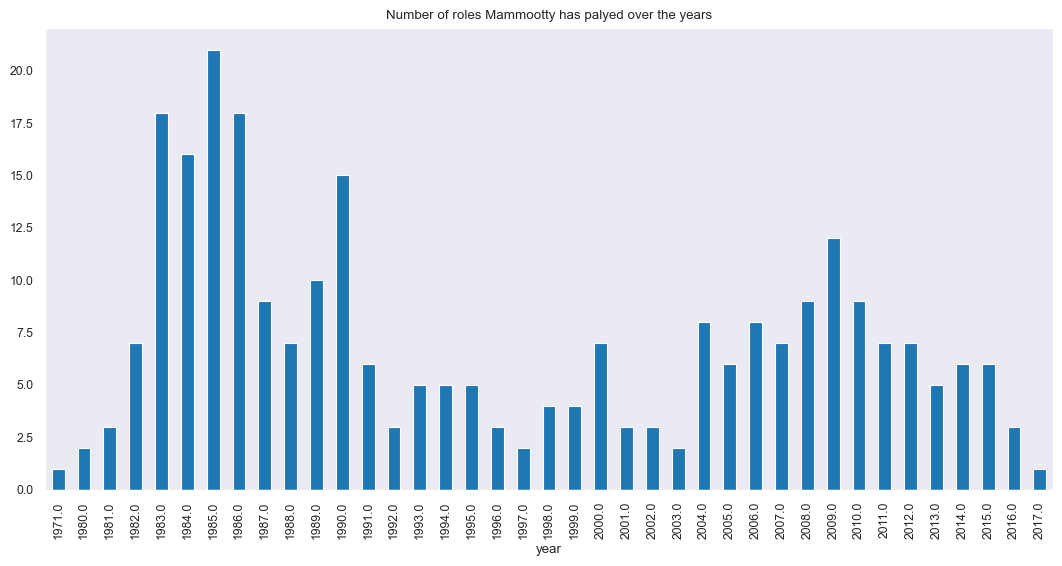

In [246]:
plt.figure(figsize=(13,6))
sns.set_context(context='paper')
c=cast
c[c.name == 'Mammootty'].year.value_counts().sort_index().plot(kind = 'bar',title = "Number of roles Mammootty has palyed over the years")
plt.grid()
plt.show()

### 13. What are the 10 most frequent roles that start with the phrase "Patron in"?

In [259]:
c=cast.dropna()
x = c[c['character'].str.startswith("Patron in")]['character'].value_counts().head(10)

print(f"{start}{red}the 10 most frequent roles that start with the phrase \"Patron in\" are : {end}\n\n{x}")

the 10 most frequent roles that start with the phrase "Patron in" are : 

character
Patron in Chinese Restaurant    5
Patron in Billiard Parlor       5
Patron in Club                  3
Patron in the Coffee House      3
Patron in booth                 2
Patron in Black                 1
Patron in Quiet Bar             1
Patron in Hooly's               1
Patron in Pool Hall             1
Name: count, dtype: int64


### 14. What are the 10 most frequent roles that start with the word "Science"?

In [265]:
c=cast.dropna()
x= c[c.character.str.startswith("Science")].character.value_counts().head(10)
print(f"{start}{red}the 10 most frequent roles that start with the Word \"Science\" are : {end}\n\n{x}")

the 10 most frequent roles that start with the Word "Science" are : 

character
Science Teacher         25
Science Club Member      5
Science Reporter         5
Science Fair Judge       3
Science teacher          2
Science Kid              2
Science Performer 2      1
Science Tech #4          1
Science Lecturer         1
Science Officer Arks     1
Name: count, dtype: int64


### 15.Plot the n-values of the roles that Judi Dench has played over her career.

In [ ]:
 # - 'line' : line plot (default)
 #    - 'bar' : vertical bar plot
 #    - 'barh' : horizontal bar plot
 #    - 'hist' : histogram
 #    - 'box' : boxplot
 #    - 'kde' : Kernel Density Estimation plot
 #    - 'density' : same as 'kde'
 #    - 'area' : area plot
 #    - 'pie' : pie plot
 #    - 'scatter' : scatter plot (DataFrame only)
 #    - 'hexbin' : hexbin plot (DataFrame only)

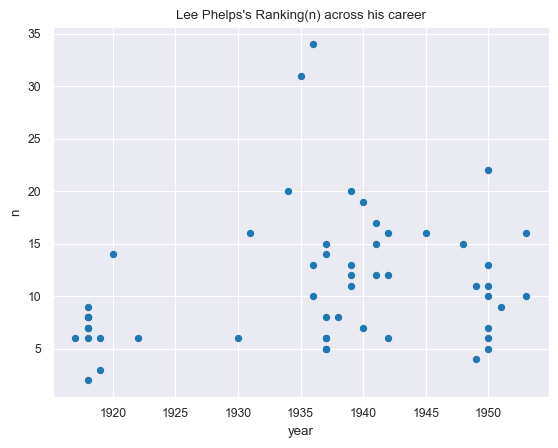

In [320]:
c=cast
c= c[c.name == "Lee Phelps"].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year',y='n', kind='scatter')
plt.title("Lee Phelps's Ranking(n) across his career")
plt.show()

# sns.lineplot(data = c,x='year',y='n')
# plt.show()


# sns.scatterplot(data = c,x='year',y='n')
# plt.show()

<Figure size 2000x500 with 0 Axes>

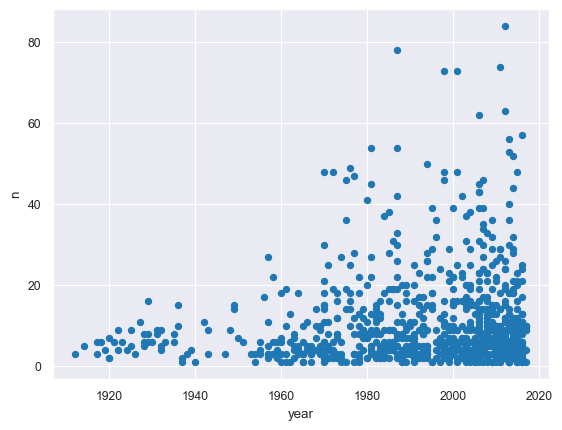

In [304]:
plt.figure(figsize=(20,5))
c=cast[cast.character == 'Father'].plot(x='year', y='n', kind='scatter')
plt.show()

In [309]:
cast.name.value_counts().head(50)

name
Herman Hack            687
Sam (II) Harris        657
Lee Phelps             622
Harold Miller          615
Frank O'Connor         610
Tom London             562
Franklyn Farnum        559
Larry Steers           553
Frank Ellis            543
Bud Osborne            511
Edmund Cobb            503
Charles Sullivan       492
Jeffrey Sayre          476
Jack Mower             476
William H. O'Brien     476
Stuart Holmes          468
Harry Strang           463
Donald Kerr            457
Kenner G. Kemp         457
Stanley Blystone       442
James Conaty           437
Ernie Adams            431
George Magrill         430
Ethan Laidlaw          424
Wade Boteler           423
George Morrell         417
Lester Dorr            413
Mike Lally             410
Irving Bacon           406
Cyril Ring             404
Chuck Hamilton         401
James Flavin           400
Hank Bell              395
George Chesebro        392
Frank Hagney           389
Selmer Jackson         389
Edward Peil Sr.        

### 16. Plot the n-values of Cary Grant's roles through his career.

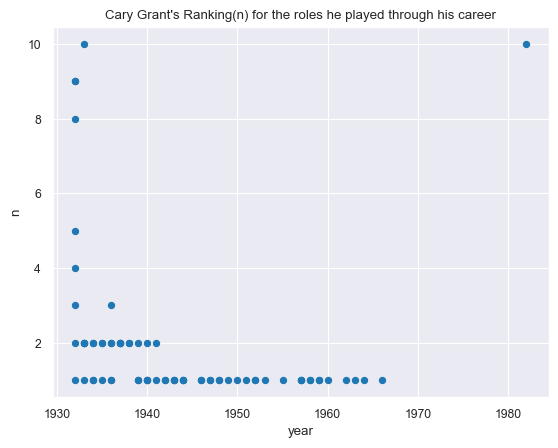

In [323]:
c= cast
c=c[c.name == "Cary Grant"].sort_values('year')
c = c[c.n.notnull()]
c.plot(kind = 'scatter',x='year',y='n',title = "Cary Grant's Ranking(n) for the roles he played through his career")
plt.show()

### 17. Plot the n-value of the roles that Sidney Poitier has acted over the years.

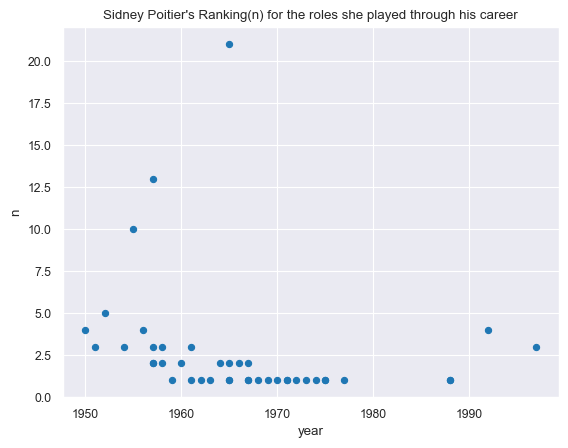

In [324]:
c= cast
c=c[c.name == "Sidney Poitier"].sort_values('year')
c = c[c.n.notnull()]
c.plot(kind = 'scatter',x='year',y='n',title = "Sidney Poitier's Ranking(n) for the roles she played through his career")
plt.show()

### 18. How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [338]:
c= cast
# c = c.dropna()
c=c[(c.year//10 *10 == 1950) &(c.n == 1)]
x= c.type.value_counts()
print(f"{start}{red}The number of leading role (n=1) that were avaiable to actors  in the 1950s is:{end}\n\n{x}")

The number of leading roled that were avaiable to actors  in the 1950s is:

type
actor    5910
Name: count, dtype: int64


In [330]:
c= cast
c=c[(c.year//10 *10 == 1950)]
c=c[c.n == 1]
c.type.value_counts()

type
actor    5910
Name: count, dtype: int64

### 19. How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [339]:
c= cast
c=c[(c.year//10 *10 == 1950) &(c.n == 2)]
x= c.type.value_counts()
print(f"{start}{red}The number of leading role (n=2) that were avaiable to actors  in the 1950s is:{end}\n\n{x}")

The number of leading role (n=2) that were avaiable to actors  in the 1950s is:

type
actor    4117
Name: count, dtype: int64
